In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

from keras.optimizers import Adam


In [3]:
#readinf data
data = pd.read_csv('Shakespeare_data.csv')

In [4]:
data

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [5]:
#extracting the specific coloumn
dataset = data['PlayerLine']

In [6]:
#making one text line from data and lowercasing
corpus = []
for line in dataset:
  lowercase_line = line.lower()
  corpus.append(lowercase_line)

In [7]:
#tokeninzing
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1

In [8]:
total_words = len(tokenizer.word_index)+1
total_words

107533

In [9]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [10]:
len(input_sequences)
input_sequences[:5]

[[15943, 15943], [28323, 528], [31999, 31999], [31999, 15943], [31999, 31999]]

In [11]:
max_sequence_len = 5
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences

array([[    0,     0,     0, 15943, 15943],
       [    0,     0,     0, 28323,   528],
       [    0,     0,     0, 31999, 31999],
       ...,
       [    0,     0,     0, 68054, 15943],
       [    0,     0,     0, 15943, 33064],
       [    0,     0,     0,    42, 15943]], dtype=int32)

In [12]:
#X for features and y for labels
X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

In [13]:
def create_model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
    model.add(LSTM(150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002), metrics=['accuracy'])
    return model

In [14]:
model = create_model(total_words, max_sequence_len)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
EPOCHS = 15
history = model.fit(X, y, epochs = EPOCHS)

Epoch 1/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 65s 584ms/step - accuracy: 0.2509 - loss: 7.0979
Epoch 2/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 70s 467ms/step - accuracy: 0.2594 - loss: 2.5434
Epoch 3/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 46s 458ms/step - accuracy: 0.2655 - loss: 2.5355
Epoch 4/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 91s 545ms/step - accuracy: 0.2564 - loss: 2.4960
Epoch 5/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 83s 550ms/step - accuracy: 0.2586 - loss: 2.5064
Epoch 6/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 49s 483ms/step - accuracy: 0.2493 - loss: 2.5338
Epoch 7/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 81s 476ms/step - accuracy: 0.2567 - loss: 2.5570
Epoch 8/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 80s 461ms/step - accuracy: 0.2714 - loss: 2.5153
Epoch 9/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 90s 538ms/step - accuracy: 0.2701 - loss: 2.5398
Epoch 10/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 75s 466ms/step - accuracy: 0.2733 - loss: 2.4740
Epoch 11/15
101/101 ━━━━━━━━━━━━━━━━━━━━ 48s 475ms/step - accuracy: 0.2488 - loss: 2.5204
Epoch 12/15
101/101

In [16]:
def test_generator(string, num):
    if len(string)==0:
        print("No word found")
        return
    for _ in range(num):
        token_list = tokenizer.texts_to_sequences([string])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding = "pre")
        probabilities = model.predict(token_list)
        choice = np.random.choice([1,2,3])
        predicted = np.argsort(probabilities, axis = -1)[0][-choice]
        if predicted !=0:
            generated_word = tokenizer.index_word[predicted]
            string += " " + generated_word
    print(string)

In [24]:
test_generator("Nor bruise her flowerets with", 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Nor bruise her flowerets with that


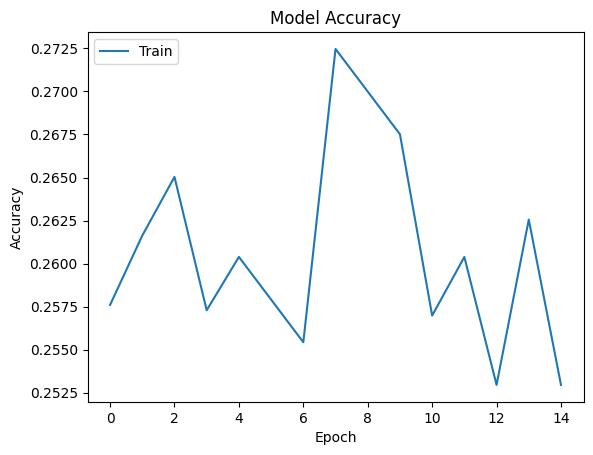

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()